In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score



In [3]:
df = pd.read_csv("Shopping Mall Customer Segmentation Data .csv")
df.head()



,Customer ID,Age,Gender,Annual Income,Spending Score
0,d410ea53-6661-42a9-ad3a-f554b05fd2a7,30,Male,151479,89
1,1770b26f-493f-46b6-837f-4237fb5a314e,58,Female,185088,95
2,e81aa8eb-1767-4b77-87ce-1620dc732c5e,62,Female,70912,76
3,9795712a-ad19-47bf-8886-4f997d6046e3,23,Male,55460,57
4,64139426-2226-4cd6-bf09-91bce4b4db5e,24,Male,153752,76


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15079 entries, 0 to 15078
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Customer ID     15079 non-null  object
 1   Age             15079 non-null  int64 
 2   Gender          15079 non-null  object
 3   Annual Income   15079 non-null  int64 
 4   Spending Score  15079 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 589.2+ KB


In [5]:
df.describe()

,Age,Annual Income,Spending Score
count,15079.000000,15079.000000,15079.000000
mean,54.191591,109742.880562,50.591617
std,21.119207,52249.425866,28.726977
min,18.000000,20022.000000,1.000000
25%,36.000000,64141.000000,26.000000
50%,54.000000,109190.000000,51.000000
75%,72.000000,155008.000000,75.000000
max,90.000000,199974.000000,100.000000


In [7]:
# Select features for clustering
X = df[['Annual Income', 'Spending Score']]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [8]:
X_scaled

array([[ 0.79881267,  1.33705873],
       [ 1.44207552,  1.54592857],
       [-0.74320756,  0.88450743],
       ...,
       [ 0.04965041, -0.09021845],
       [-0.2953409 , -1.58711891],
       [-0.60668478, -1.69155383]], shape=(15079, 2))

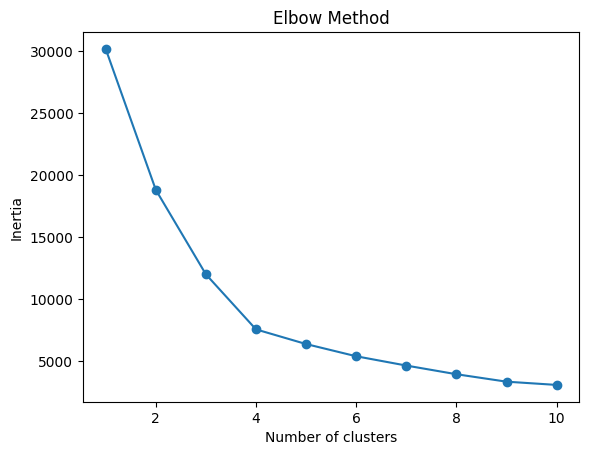

In [9]:
# Elbow Method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()



In [10]:
# Silhouette Score
for n in range(2, 11):
    kmeans = KMeans(n_clusters=n, random_state=42)
    preds = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, preds)
    print(f"Clusters: {n} => Silhouette Score: {score:.3f}")


Clusters: 2 => Silhouette Score: 0.355
Clusters: 3 => Silhouette Score: 0.375
Clusters: 4 => Silhouette Score: 0.406
Clusters: 5 => Silhouette Score: 0.391
Clusters: 6 => Silhouette Score: 0.378
Clusters: 7 => Silhouette Score: 0.366
Clusters: 8 => Silhouette Score: 0.362
Clusters: 9 => Silhouette Score: 0.366
Clusters: 10 => Silhouette Score: 0.356


In [11]:
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)


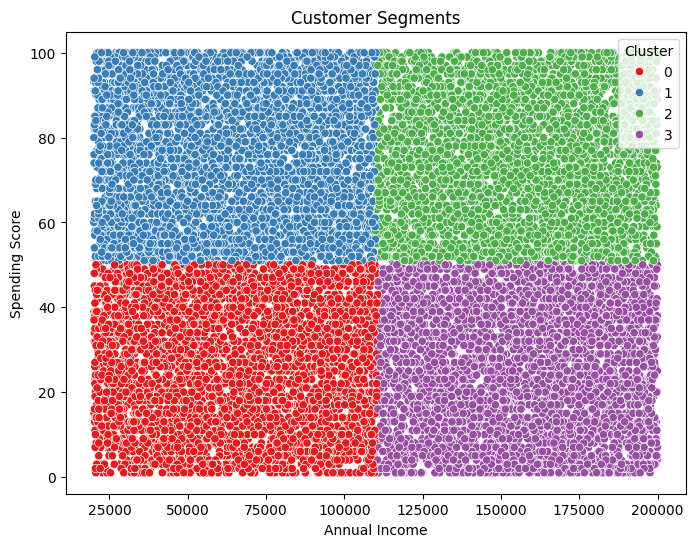

In [16]:
# Static 2D Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Annual Income', y='Spending Score', hue='Cluster', data=df, palette='Set1')
plt.title('Customer Segments')
plt.show()




In [17]:
import pandas as pd


cluster_summary = pd.DataFrame({
    'Cluster': [0, 1, 2, 3],
    'Income Level': ['Low', 'High', 'High', 'Low', ],
    'Spending Behavior': ['High', 'Low', 'High', 'Low',],
    'Description': [
        'Budget-conscious but frequent',
        'Wealthy but low-spending',
        'Premium customers 🏆',
        'Minimal shoppers',
        
    ]
})

# Display the table
print(cluster_summary)


   Cluster Income Level Spending Behavior                    Description
0        0          Low              High  Budget-conscious but frequent
1        1         High               Low       Wealthy but low-spending
2        2         High              High            Premium customers 🏆
3        3          Low               Low               Minimal shoppers
